In [17]:
import wandb
import matplotlib.pyplot as plt

# Initialize the W&B API
api = wandb.Api()

data_dir = {'masked':{}, 'mixed': {}}

# Replace with your run path
run_path = "fengc/maskdiff/z8lyegz9"

# Fetch the run
run = api.run(run_path)

# Convert the run history to a DataFrame
history = run.history()

data_dir['masked']['train'], data_dir['masked']['test'] = history['loss_masked'], history['test_loss_masked']

run_path = "fengc/maskdiff/0z9rtgc4"

# Fetch the run
run = api.run(run_path)

# Convert the run history to a DataFrame
history = run.history()

data_dir['mixed']['train'], data_dir['mixed']['test'] = history['loss_masked'], history['test_loss_masked']


In [54]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
import torch
from sklearn.linear_model import LinearRegression

plt.style.use("default")
rc = {
    "figure.figsize": (3.2, 2.4),
    "figure.dpi": 200,
    "figure.constrained_layout.use": True,
    "axes.grid": True,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.linewidth": 0.5,
    "grid.linewidth": 0.5,
    "xtick.major.width": 0.5,
    "ytick.major.width": 0.5,
    "xtick.major.size": 2.5,
    "ytick.major.size": 2.5,
    "axes.labelsize": "small",
    "axes.titlesize": "small",
    "xtick.labelsize": "small",
    "ytick.labelsize": "small",
    "axes.titlepad": 2,
    "axes.labelpad": 2,
    "xtick.major.pad": 2,
    "ytick.major.pad": 2,
    "lines.linewidth": 1,
    "patch.linewidth": 0,
}

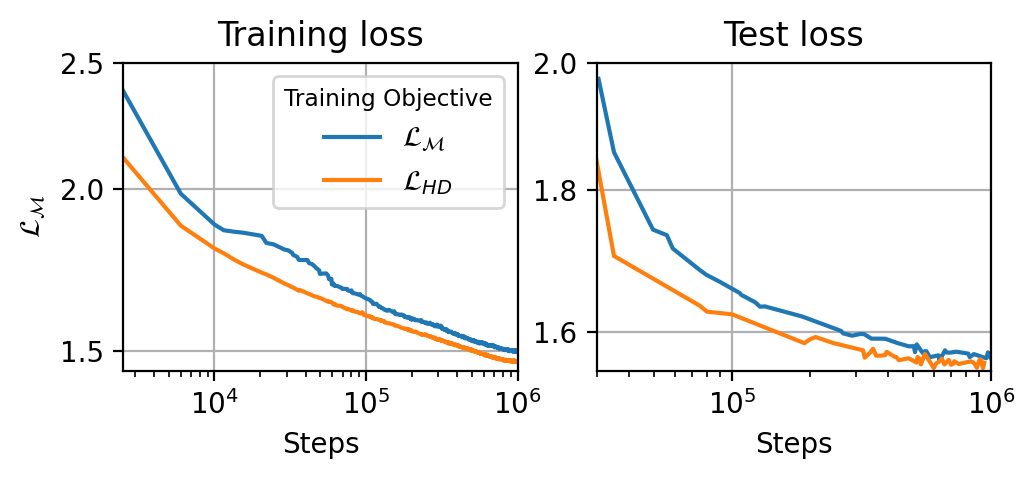

In [84]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

fig, axes = plt.subplots(1, 2, figsize=(2.8*2, 2.0), dpi=200)

# Set more white space
plt.subplots_adjust(wspace=0.2)

ax = axes[0]
ax.plot(history['_step'].to_numpy(), data_dir['masked']['train'].dropna().to_numpy(), label=r'$\mathcal{L}_\mathcal{M}$')
ax.plot(history['_step'].to_numpy(), data_dir['mixed']['train'].dropna().to_numpy(), label='$\mathcal{L}_{HD}$')
ax.set_xlabel('Steps')
ax.set_ylabel(r'$\mathcal{L}_{\mathcal{M}}$')
ax.set_title(r'Training loss')
ax.grid(which='major')
ax.yaxis.grid(which='minor')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1.45, 2.5])
ax.set_yticks([1.5,2.0,2.5])
ax.set_xlim([2.5e3, 1e6])
ax.legend(title='Training Objective', title_fontsize='small')
ax.yaxis.set_minor_locator(mticker.NullLocator())
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.ticklabel_format(axis='y', style='plain', useOffset=False) 
# Use LogFormatter to avoid scientific notation
# ax.yaxis.set_major_formatter(mticker.LogFormatterExponent(base=10, labelOnlyBase=False))


ax = axes[1]
ax.plot(history['_step'][data_dir['masked']['test'].notna()].to_numpy(), data_dir['masked']['test'].dropna().to_numpy())
ax.plot(history['_step'][data_dir['mixed']['test'].notna()].to_numpy(), data_dir['mixed']['test'].dropna().to_numpy())
ax.set_xlabel('Steps')
ax.set_title(r'Test loss')
ax.grid('both')
ax.set_xscale('log')
ax.yaxis.grid(which='minor')
ax.set_yscale('log')
ax.set_yticks([1.6,1.8,2.0])  
ax.set_ylim([1.55, 2.0])
ax.set_xlim([3e4, 1e6])
ax.yaxis.set_minor_locator(mticker.NullLocator())
# Use LogFormatter for the second axis as well
# ax.yaxis.set_major_formatter(mticker.LogFormatterExponent(base=10, labelOnlyBase=False))
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.ticklabel_format(axis='y', style='plain', useOffset=False) 
plt.savefig('text9loss.pdf', bbox_inches='tight')
plt.show()


In [12]:
data_dir['masked']['train'].dropna().to_numpy()

array([3.62779999, 2.64340138, 2.12436938, 2.00213408, 1.96718383,
       1.95691288, 1.88319957, 1.85342717, 1.82802308, 1.82254422,
       1.81806958, 1.81268597, 1.79381156, 1.77809429, 1.77382481,
       1.76597714, 1.76355267, 1.76296246, 1.75871503, 1.7427907 ,
       1.73350394, 1.7281214 , 1.72080302, 1.71074867, 1.70698678,
       1.6975534 , 1.69505584, 1.69292831, 1.68713117, 1.67855048,
       1.67507398, 1.66875541, 1.66871011, 1.66151571, 1.65946317,
       1.65933049, 1.66105223, 1.65654027, 1.65700376, 1.64959431,
       1.6498816 , 1.64965379, 1.64947784, 1.64471316, 1.64274085,
       1.64454257, 1.64168823, 1.64015555, 1.64130652, 1.63899767,
       1.64042461, 1.63743889, 1.63775301, 1.63208795, 1.63064122,
       1.62921226, 1.62914169, 1.62771845, 1.62657964, 1.6243844 ,
       1.62199855, 1.62222171, 1.62163937, 1.62322962, 1.62071574,
       1.61888146, 1.61732662, 1.61714733, 1.61645532, 1.61486673,
       1.61569774, 1.61446226, 1.61332691, 1.61228657, 1.61289